In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [70]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [71]:
class KNN:
    def __init__(self, k=5, p=2):
        self.k = k
        self.p = p
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        return self
    
    def predict(self, X):
        predictions = []

        for pred_row in X:
            eucledian_distance = []
            for X_row in self.X:
                distance = np.linalg.norm(X_row - pred_row, ord=self.p)
                eucledian_distance.append(distance)
            
            neighbors = self.y[np.argsort(eucledian_distance)[: self.k]]
            neighbors_bc = np.bincount(neighbors)
            prediction = np.argmax(neighbors_bc)
            predictions.append(prediction)
        return np.array(predictions)


In [72]:
knn = KNN()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score

Confusion Matrix:
[[13  0  0]
 [ 0 21  0]
 [ 0  0 11]]
Accuracy :  1.00


<Axes: >

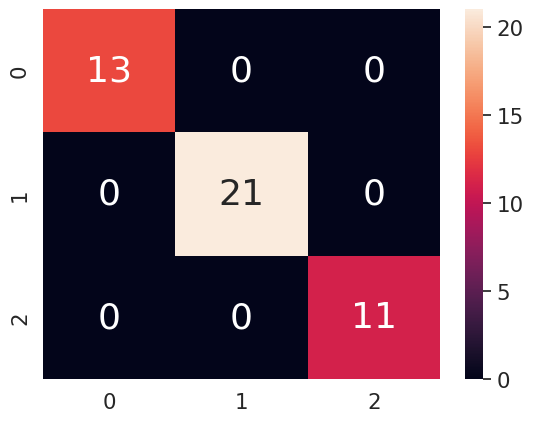

In [74]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(f"Accuracy : {accuracy_score(y_test, y_pred): 0.2f}")

sns.set(font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size" : 26})



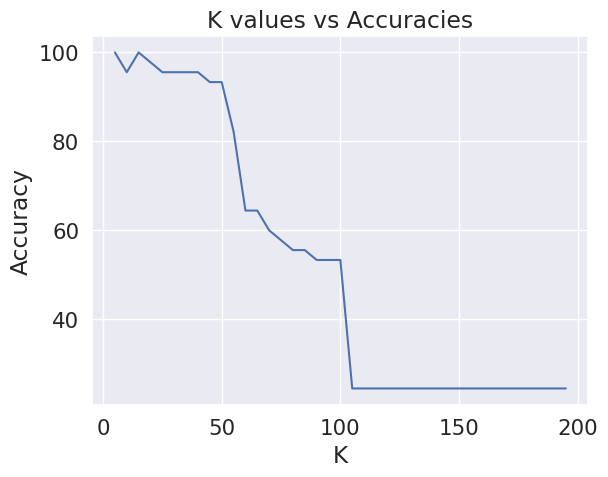

In [75]:


k_values = []
accuracies = []
for i in range(5,200,5):  #steps in values of k with 5
    knn = KNN(k = i, p = 2)  
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    k_values.append(i)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies)
plt.title("K values vs Accuracies")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()    

